In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [98]:
ticker = "AAPL"
data = yf.download(ticker)
display(data)
data.columns

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [35]:
# Remove os heades MultiIndex e transforma a coluna index Date em coluna normal 
header = ['Close','High','Low','Open','Volume']
data.columns = header
display(data)
df = data.reset_index()
df

,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400


,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
2,1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...,...
11129,2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
11130,2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
11131,2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400
11132,2025-02-12,236.869995,236.960007,230.679993,231.199997,45243300


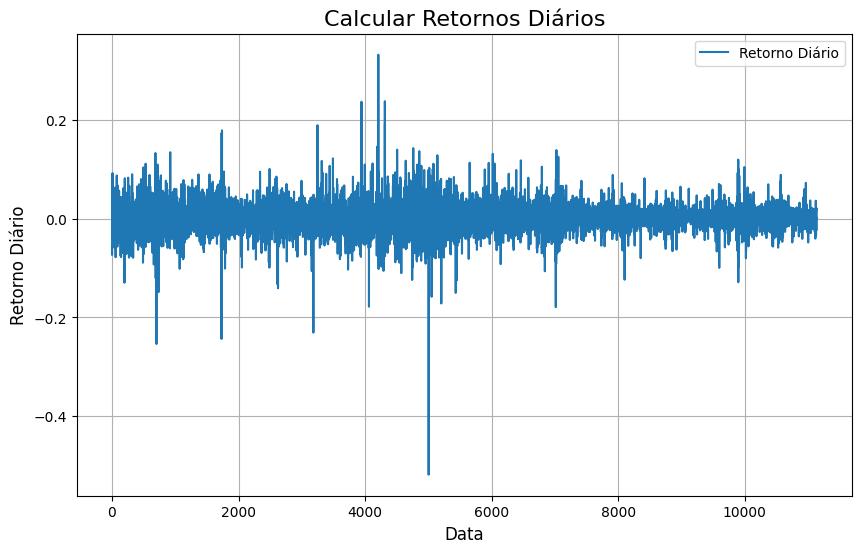

In [94]:
# 4 Calcular Retornos Diarios
plt.figure(figsize=(10, 6))
plt.plot(df['Close'].pct_change(), label='Retorno Diário')
plt.title('Calcular Retornos Diários', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário', fontsize=12)
plt.legend()
plt.grid()
plt.show()


Retorno esperado :  0.0011
Desvio padrão :  0.0278


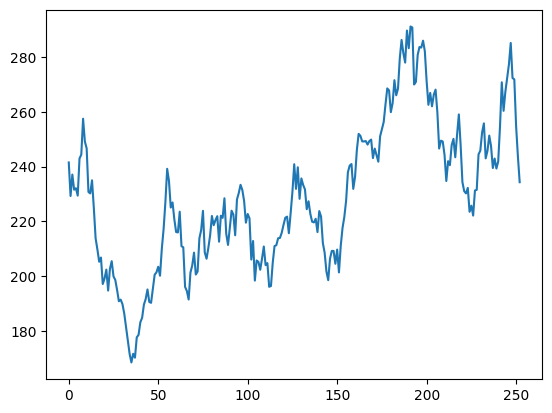

In [91]:
# 5 Parâmetros para a Simulação de Monte Carlo
media_retorno = df['Close'].pct_change().mean()
desvio_retorno = df['Close'].pct_change().std()
print ("Retorno esperado : ", str(round(media_retorno, 4)))
print ("Desvio padrão : ", str(round(desvio_retorno, 4)))
retorno_diario_sim = np.random.normal(media_retorno, desvio_retorno, 252) + 1
price_series = [df['Close'].iloc[-1]]
for j in retorno_diario_sim:
    price_series.append(price_series[-1] * j)
plt.grid()
plt.plot(price_series)

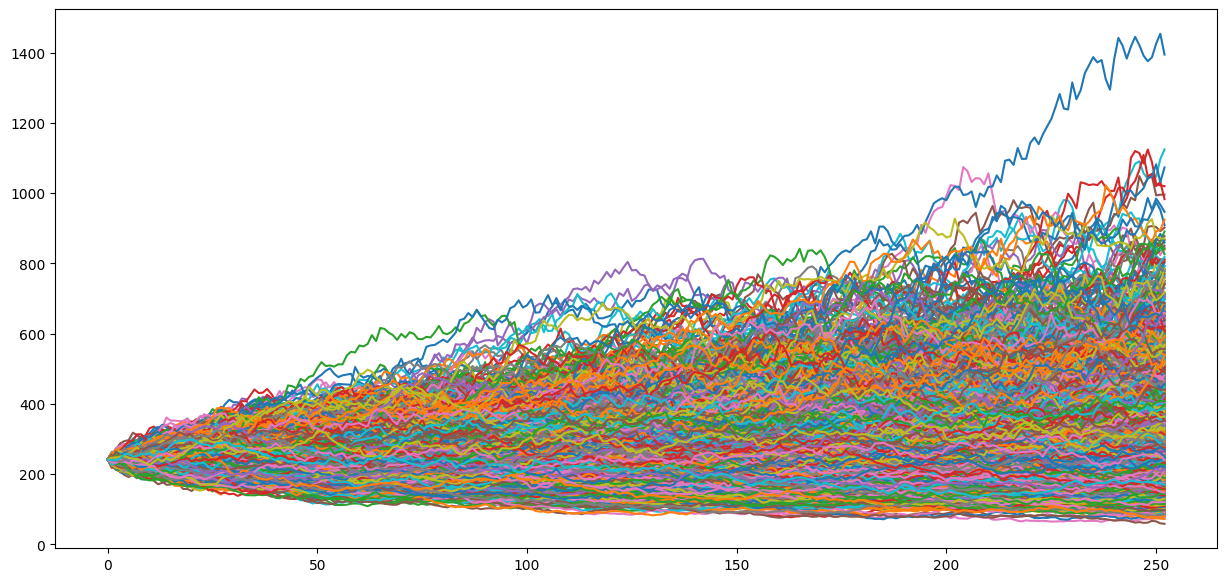

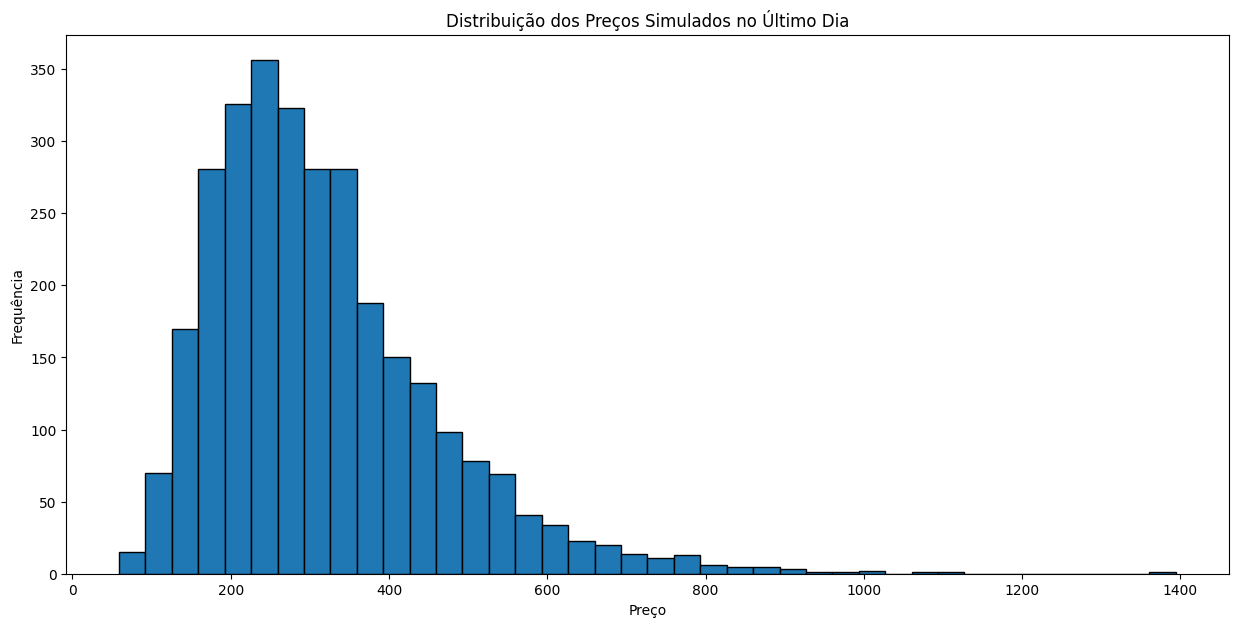

In [97]:
# 6 Simulação de Monte Carlo
# 7 Visualização dos Resultados
plt.figure(figsize = (15, 7))
numero_processos = 3000
precos_fechamento = []
for i in range(numero_processos):
    retorno_diario = np.random.normal(media_retorno, desvio_retorno, 252) + 1
    serie_precos = [df['Close'].iloc[-1]]
    for j in retorno_diario:
        serie_precos.append(serie_precos[-1] * j)
    precos_fechamento.append(serie_precos[-1])
    plt.plot(serie_precos)

plt.show()
plt.figure(figsize = (15, 7))
plt.hist(precos_fechamento,bins=40, edgecolor='black')
plt.title("Distribuição dos Preços Simulados no Último Dia")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

In [80]:
# 8 Análise dos Resultados
estatisticas = pd.Series(precos_fechamento).describe()
print("Estatísticas Descritivas ultimos 3000 dias:")
print(estatisticas)

media_final = round(np.mean(precos_fechamento),2)
print("Preço Esperado: ", str(media_final))

Estatísticas Descritivas ultimos 3000 dias:
count    3000.000000
mean      320.770133
std       146.996846
min        71.687149
25%       217.008918
50%       293.006422
75%       392.346058
max      1336.989400
dtype: float64
Preço Esperado:  320.77


In [ ]:
# 9 Conclusão
'''
A interpretação dos gráficos e resultados obtidos por simulações de Monte Carlo envolve analisar 
como a incerteza e a variabilidade nas variáveis de entrada influenciam as previsões de preços 
e as possíveis distribuições de resultados, podendo cometer erros com os valores de entrada e distribuição.
Referências:
https://aws.amazon.com/pt/what-is/monte-carlo-simulation/
https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
https://analisemacro.com.br/mercado-financeiro/metodo-monte-carlo-com-o-python/
https://awari.com.br/python-aprenda-a-usar-a-biblioteca-yfinance-para-analise-financeira/

Vinícius Gurgel Serrão - 22207295
'''